<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'><li>Obtaining the Dataset</li>
<li>Handling missing values</li>
<li>Encoding the categorical data</li>

</ul>


The Dataset for this exercise depends on your index number i.e number_of_data_set = index % 10:


0.  https://www.kaggle.com/ruchi798/drug-overdose-deaths
1.  https://www.kaggle.com/rishidamarla/employee-data-from-the-city-of-chicago
2.  https://www.kaggle.com/vikasukani/loan-eligible-dataset
3.  https://www.kaggle.com/tamilsel/healthcare-providers-data
4.  https://www.kaggle.com/chirag9073/europe-economic-crisis
5.  https://www.kaggle.com/bryanb/cac40-stocks-dataset
6.  https://www.kaggle.com/christofel04/cardiovascular-study-dataset-predict-heart-disea
7.  https://www.kaggle.com/tsaustin/us-historical-stock-prices-with-earnings-data
8.  https://www.kaggle.com/kimjihoo/coronavirusdataset (Dataset: PatientInfo.csv)
9.  https://www.kaggle.com/mczielinski/bitcoin-historical-data

In [1]:
import pandas as pd
import missingno as msno

# <font color = 'Orange'> Read your Dataset (.csv)</font>

https://www.kaggle.com/tamilsel/healthcare-providers-data

185043 % 10 = 3

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
healthcare_data=pd.read_csv('/content/drive/MyDrive/Data_Science-Datasets/Healthcare_Providers.csv')


In [4]:
print('Shape of healthcare dataset: ',healthcare_data.shape)

Shape of healthcare dataset:  (100000, 27)


In [5]:
healthcare_data.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,SAINT LOUIS,631041004.0,MO,US,Internal Medicine,Y,F,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,FAYETTEVILLE,283043815.0,NC,US,Obstetrics & Gynecology,Y,O,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,NORTH HAVEN,64732343.0,CT,US,Podiatry,Y,O,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,KANSAS CITY,641183998.0,MO,US,Internal Medicine,Y,O,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,JUPITER,334585700.0,FL,US,Internal Medicine,Y,O,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


# <font color = 'Orange'> Target column/columns </font>

Write some info about the target value/values



I choose 'Place of Service' to be target column from Healthcare dataset and work with this data 

Visualize the target column

In [6]:
 ds = healthcare_data['Place of Service'].value_counts()

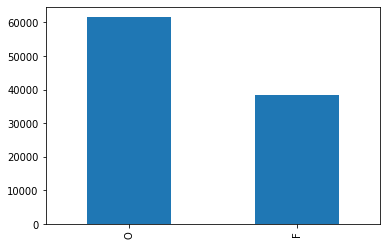

In [7]:
ds.plot.bar()

# <font color = 'Orange'>Detect the Missing values</font>

Count the percentage of missing values in every column of the Dataset. 

In [8]:
missing_values_healthcare = healthcare_data.isnull().sum()
percentage_healthcare_dataset = 100 * healthcare_data.isnull().sum() / len(healthcare_data)



In [9]:
print('Missing values: ',missing_values_healthcare)
print('Percantage of null healthcare dataset values: ',percentage_healthcare_dataset)

Missing values:  index                                                           0
National Provider Identifier                                    0
Last Name/Organization Name of the Provider                     0
First Name of the Provider                                   4255
Middle Initial of the Provider                              29331
Credentials of the Provider                                  7209
Gender of the Provider                                       4254
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
Street Address 2 of the Provider                            59363
City of the Provider                                            0
Zip Code of the Provider                                        0
State Code of the Provider                                      0
Country Code of the Provider                                    0
Provider Type                                              

In [10]:
missing_values_table_healthcare = pd.concat([missing_values_healthcare, percentage_healthcare_dataset], axis=1)
missing_values_table_healthcare.columns = ['Number of missing values of healthcare dataset','% of missing values']


In [11]:
missing_values_table_healthcare

,Number of missing values of healthcare dataset,% of missing values
index,0,0.000
National Provider Identifier,0,0.000
Last Name/Organization Name of the Provider,0,0.000
First Name of the Provider,4255,4.255
Middle Initial of the Provider,29331,29.331
Credentials of the Provider,7209,7.209
Gender of the Provider,4254,4.254
Entity Type of the Provider,0,0.000
Street Address 1 of the Provider,0,0.000
Street Address 2 of the Provider,59363,59.363


Visualize the missing values using Missingno library

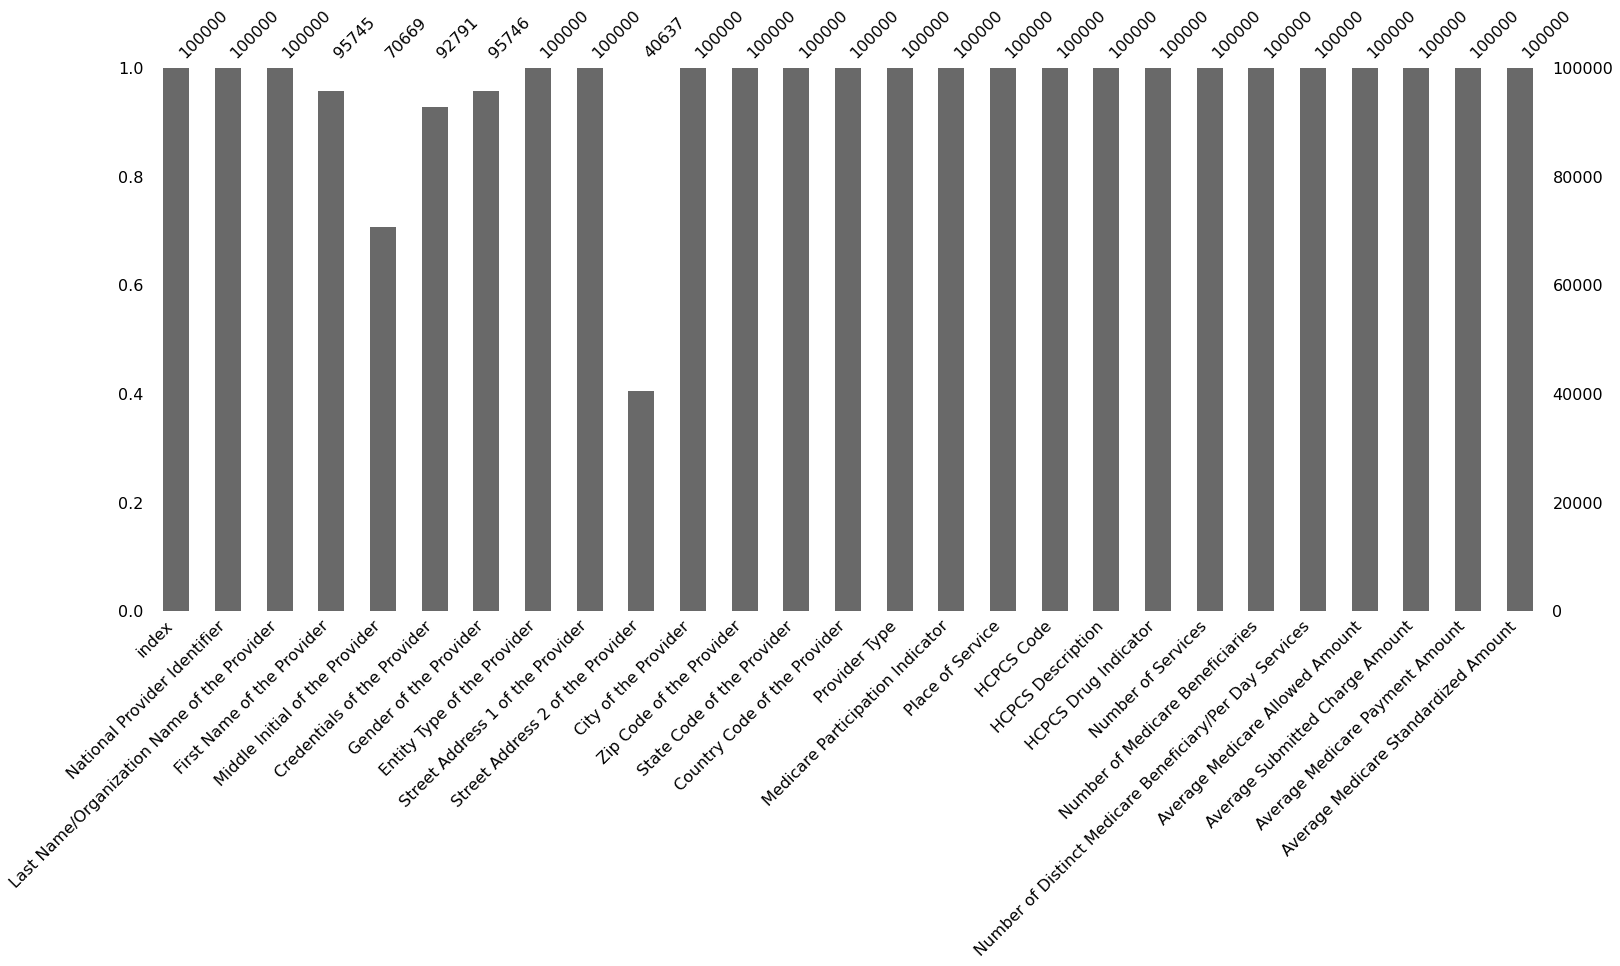

In [12]:
msno.bar(healthcare_data)

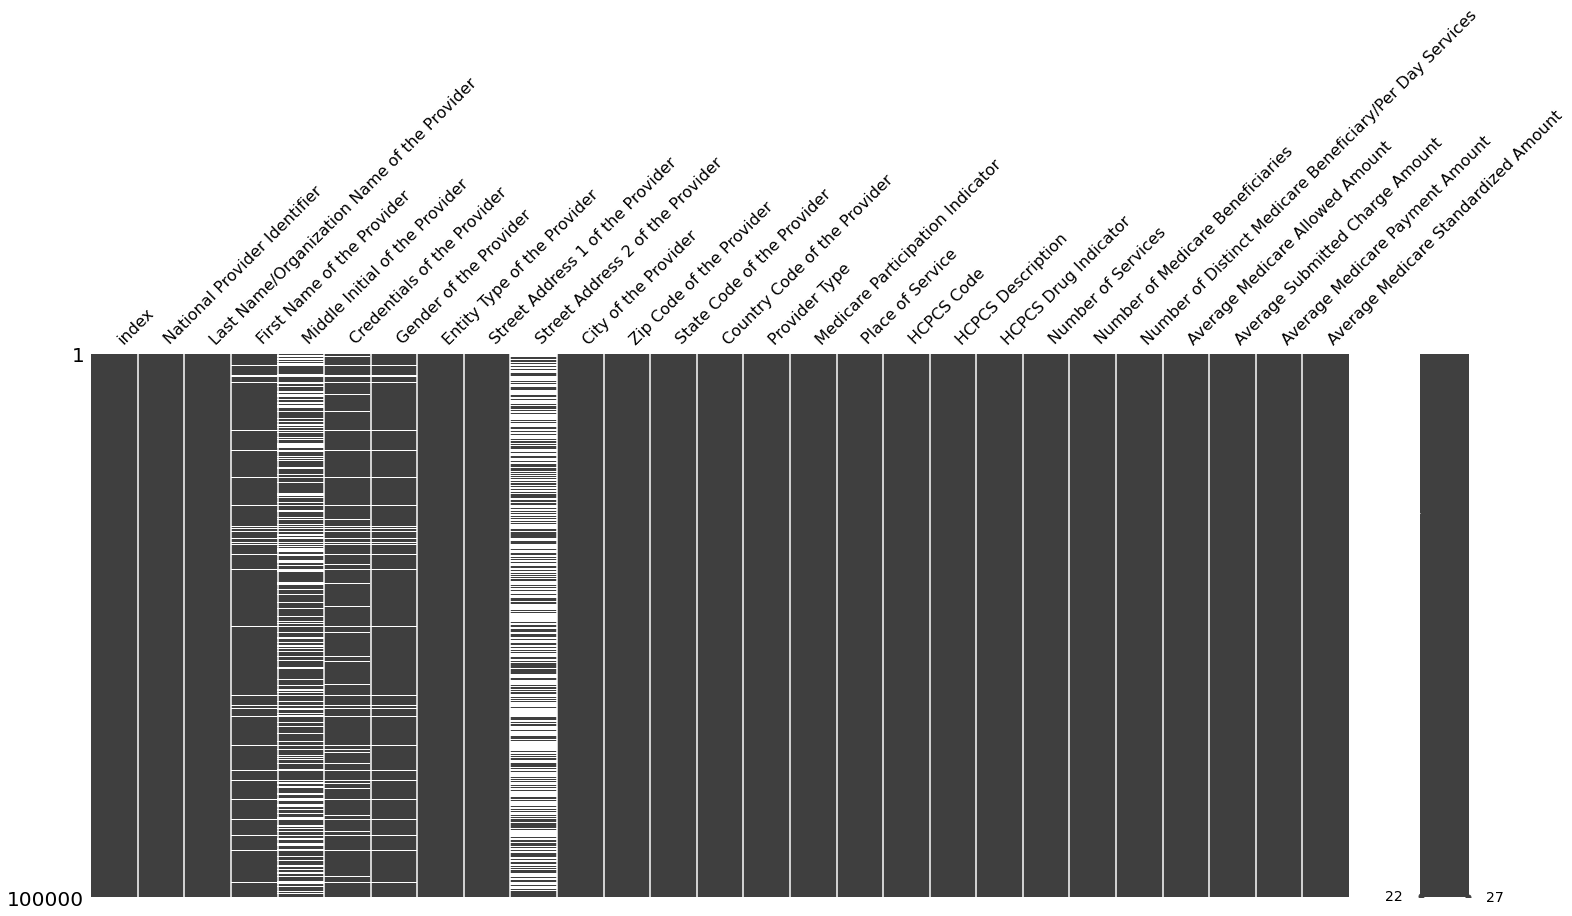

In [13]:
msno.matrix(healthcare_data)

# <font color = 'Orange'> Find reasons for the missing values</font>


With the help of visualization matrix, heatmap, dendrogram, show the dependence between the columns with missing values

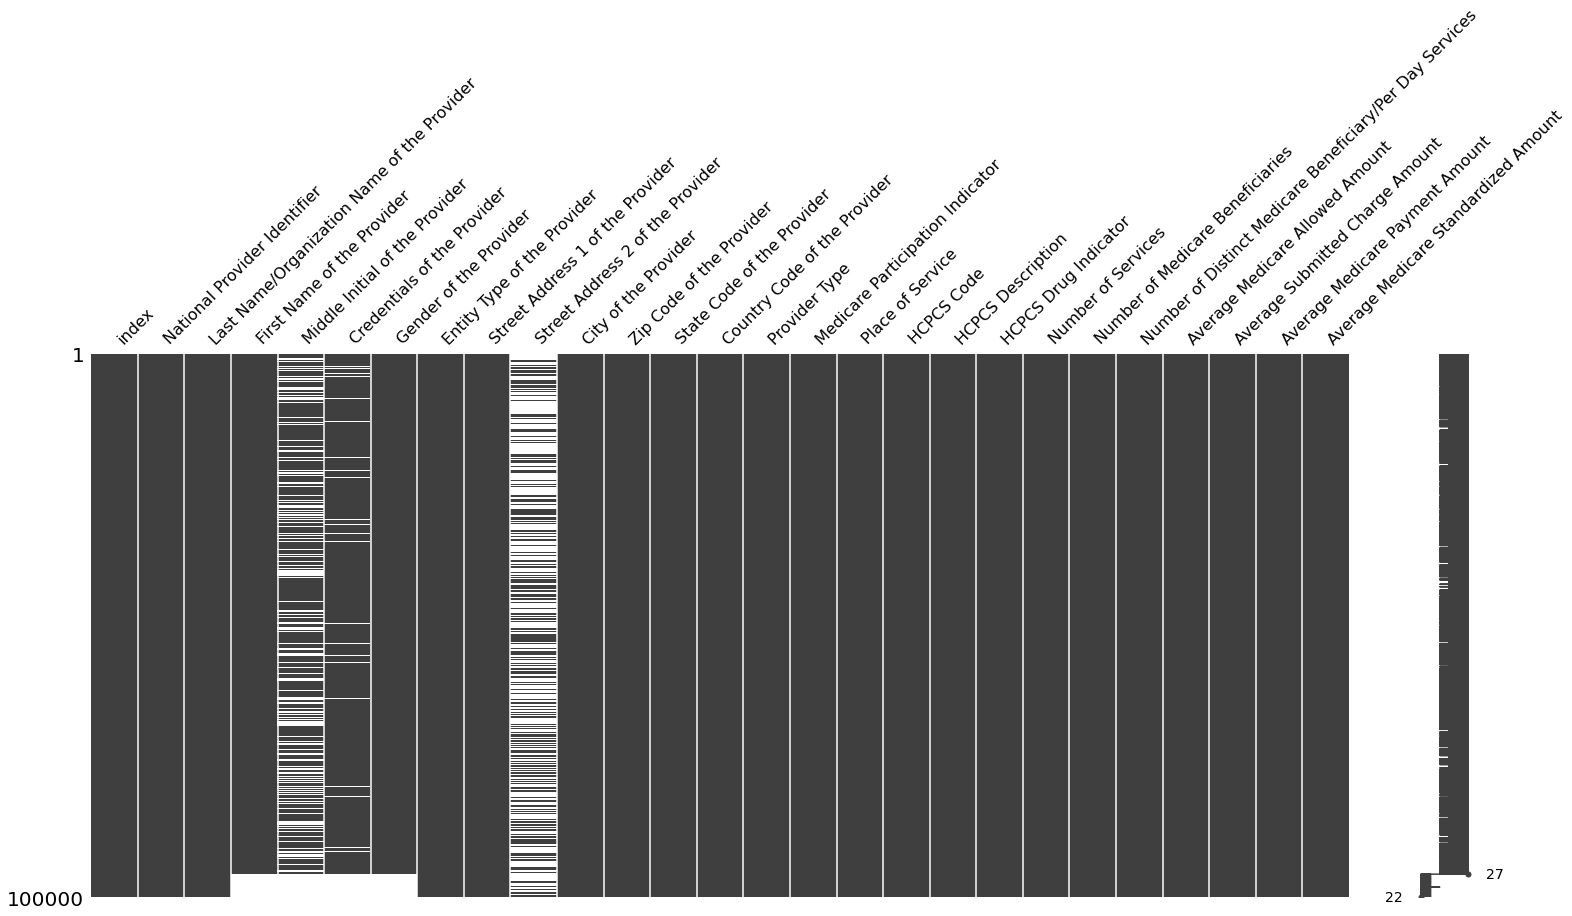

In [14]:
#sorted by values where we can see disorder
msno.matrix(healthcare_data.sort_values('First Name of the Provider'))

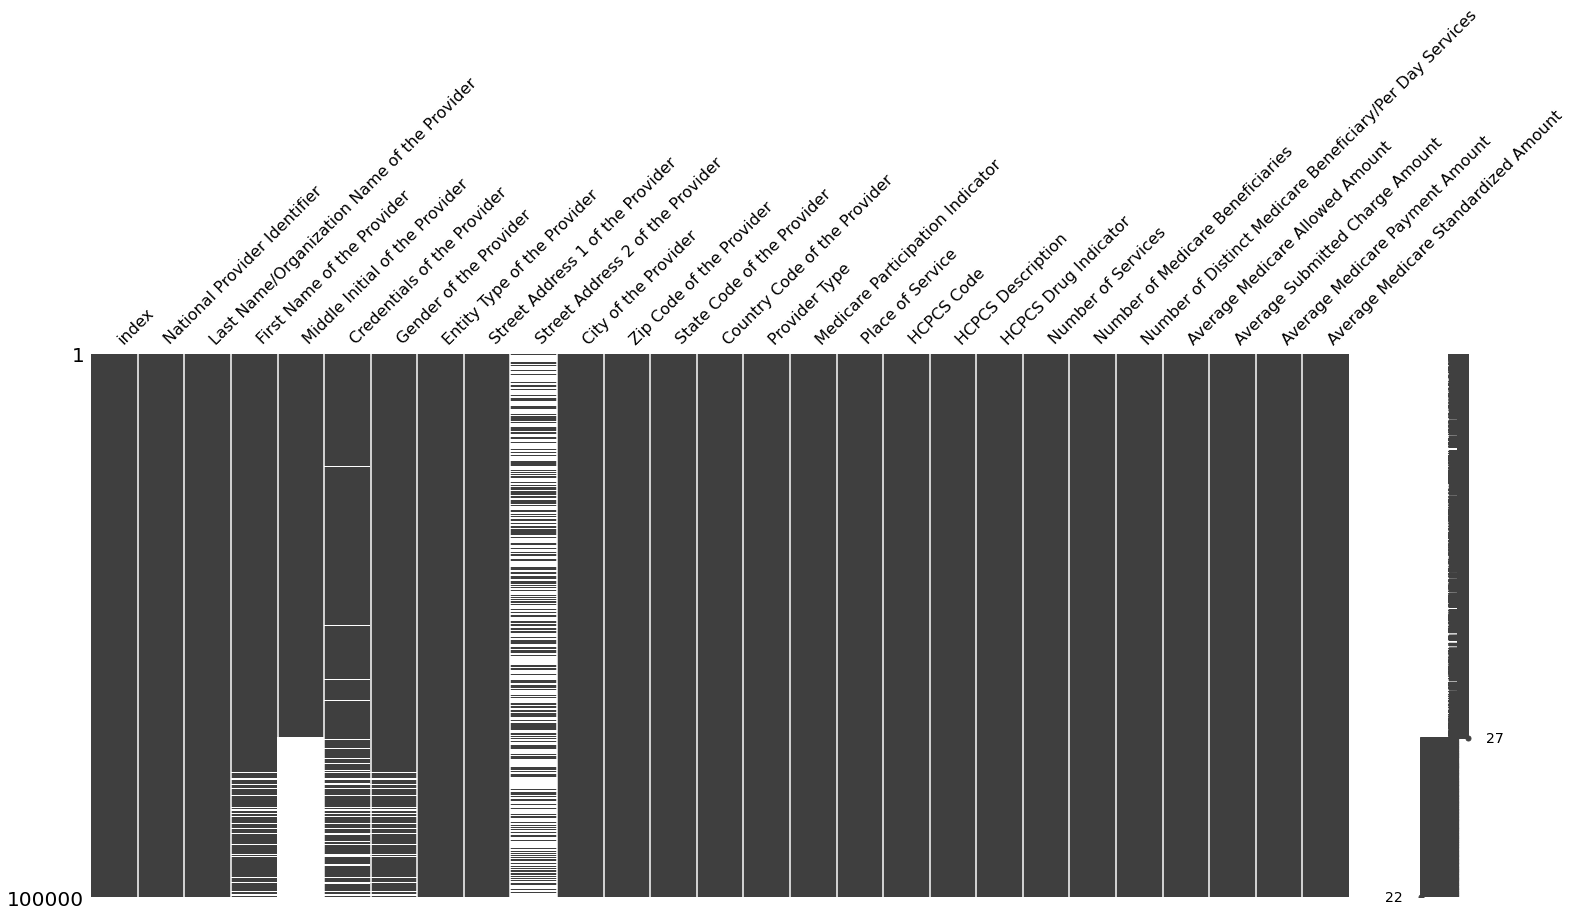

In [15]:
msno.matrix(healthcare_data.sort_values('Middle Initial of the Provider'))

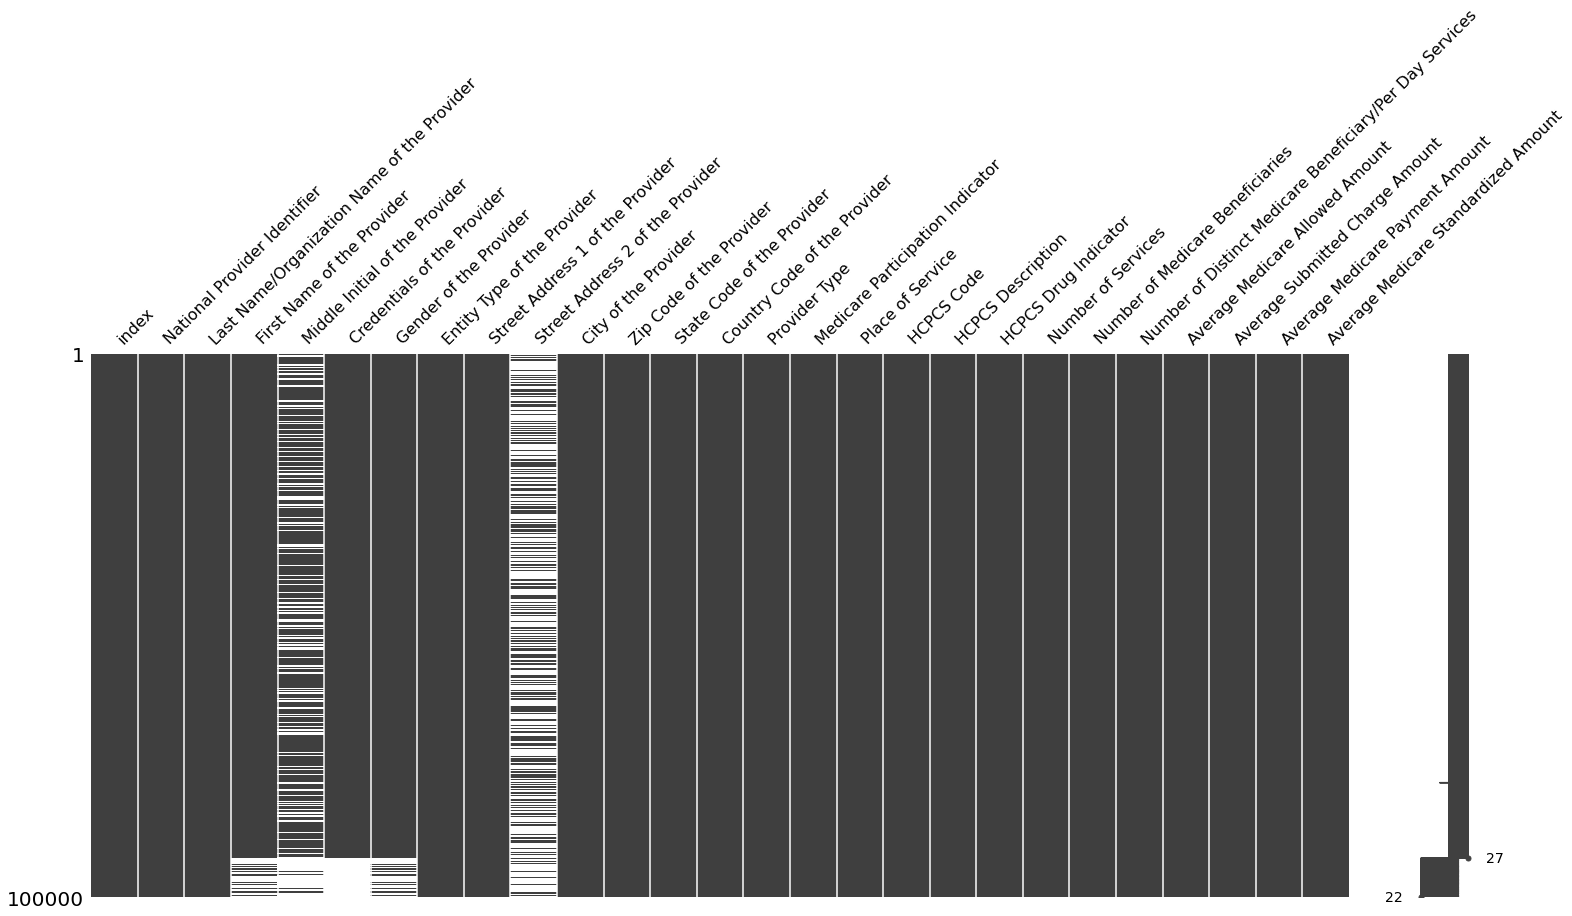

In [16]:
msno.matrix(healthcare_data.sort_values('Credentials of the Provider'))

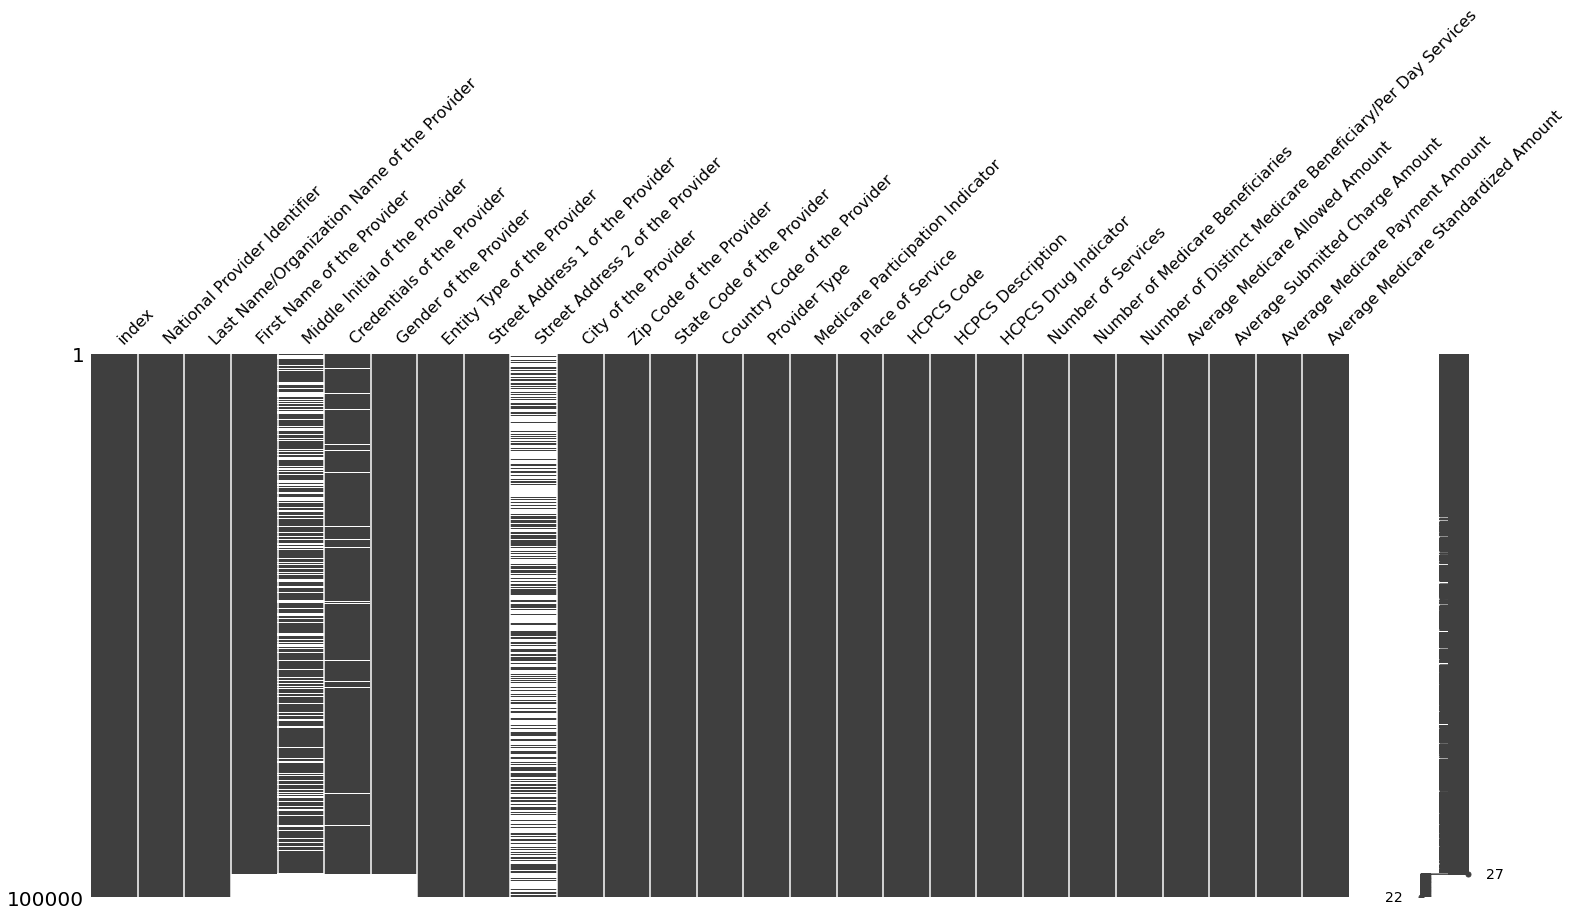

In [17]:
msno.matrix(healthcare_data.sort_values('Gender of the Provider'))

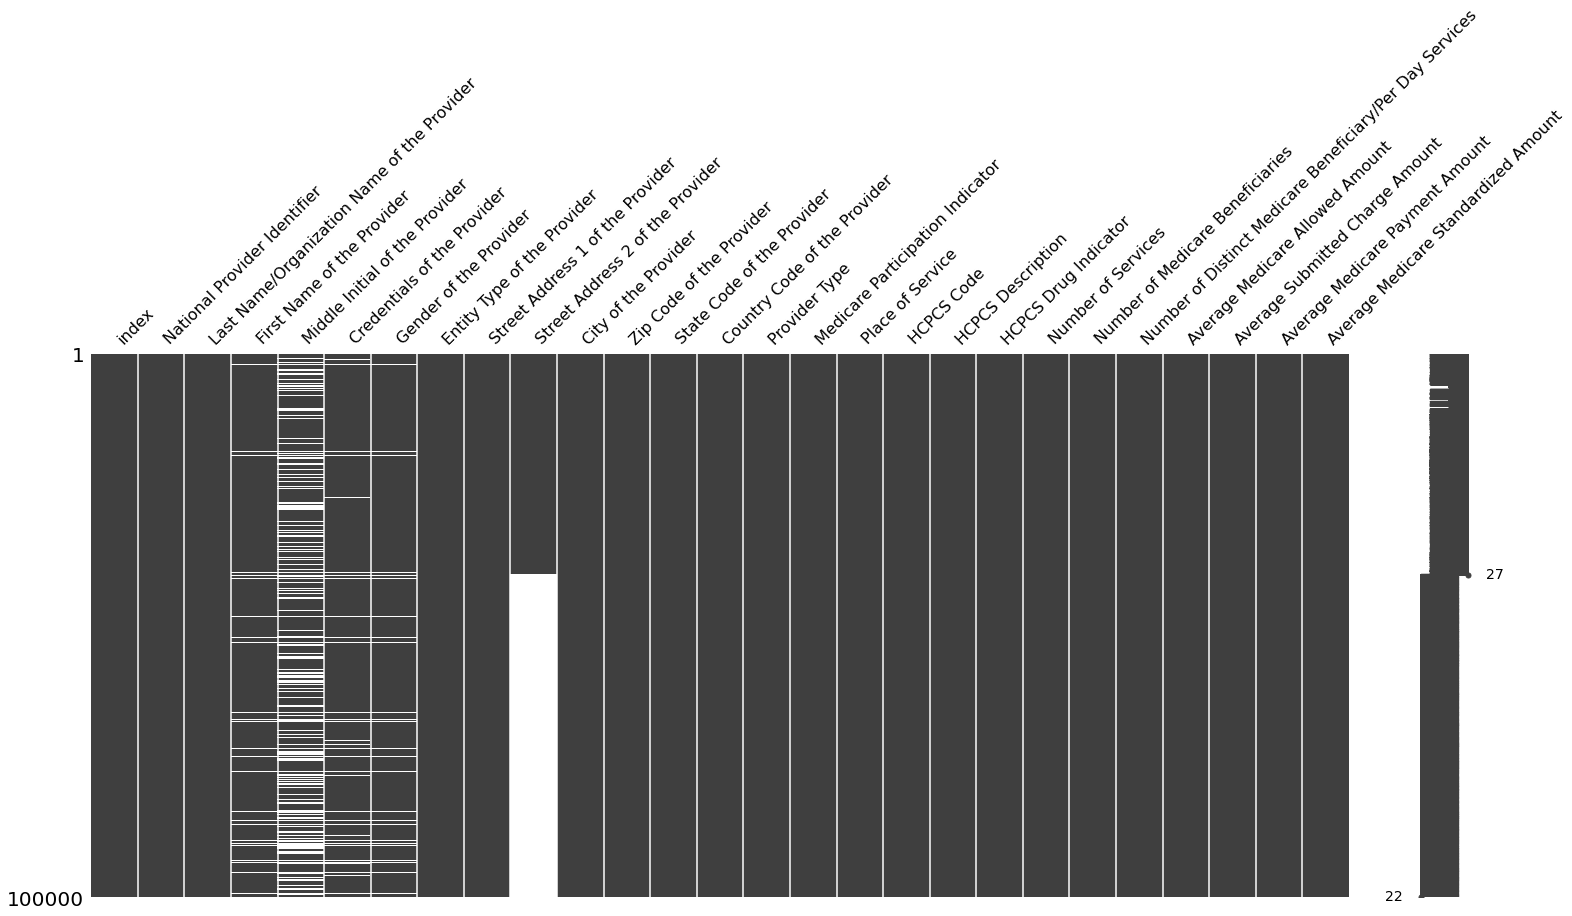

In [18]:
msno.matrix(healthcare_data.sort_values('Street Address 2 of the Provider'))

Write the reasons for the missing values

 There is relation between the missingness of the data in First Name of the Provider with Credentials of the Provider and Gender. Middle Initial of the Provider, Credentials and Street Address 2 of the Provider columns. I can see that in some records there are missing values for the same data. We can also draw a Heatmap among the different variables in the dataset.
 The reason for missing values for First Name, Gender and Credentials is MAR, but most for First Name and Gender because there are fully dependent on each other. Middle Initial of the Provider and Street Address 2 of the Provider have NMAR as reason for missing values.

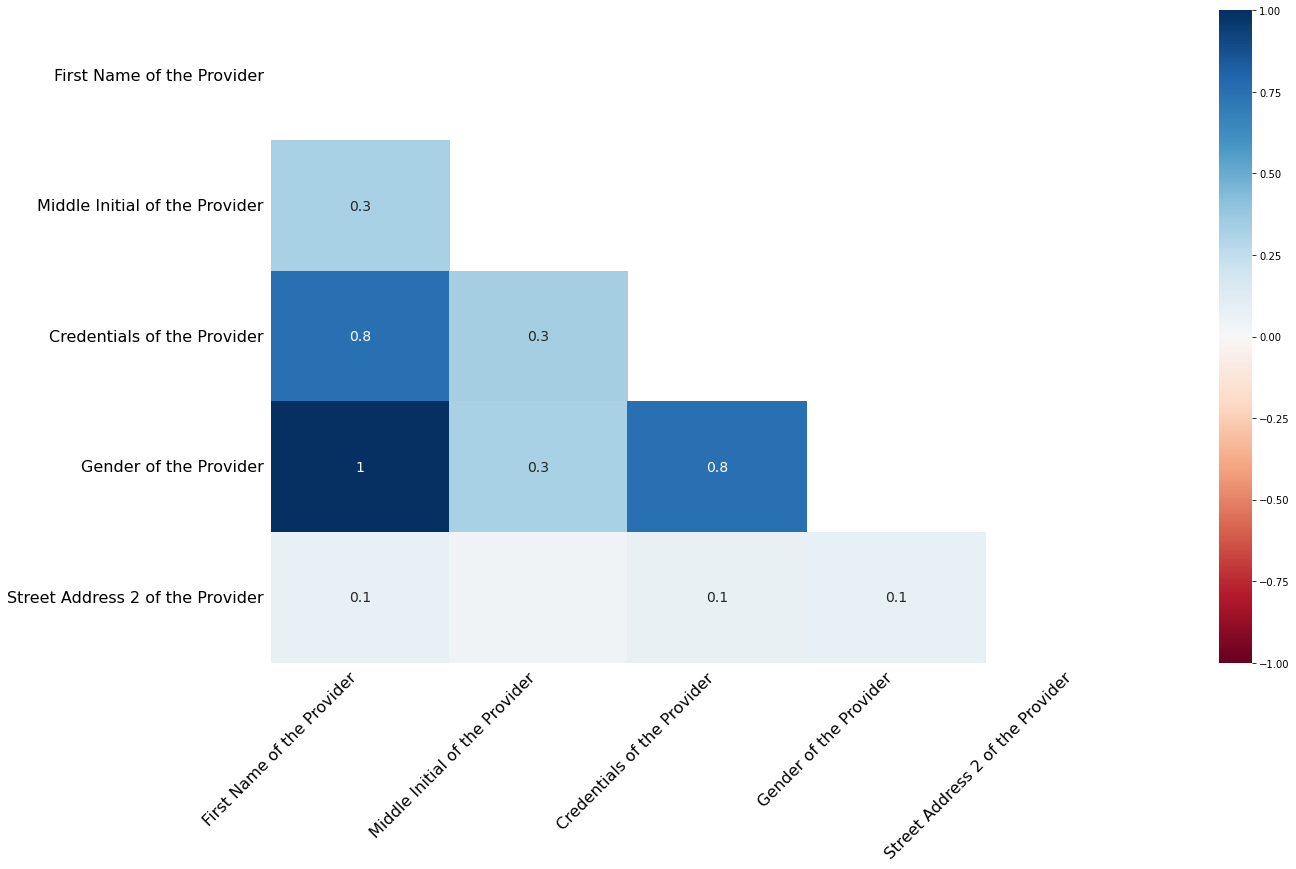

In [19]:
msno.heatmap(healthcare_data)

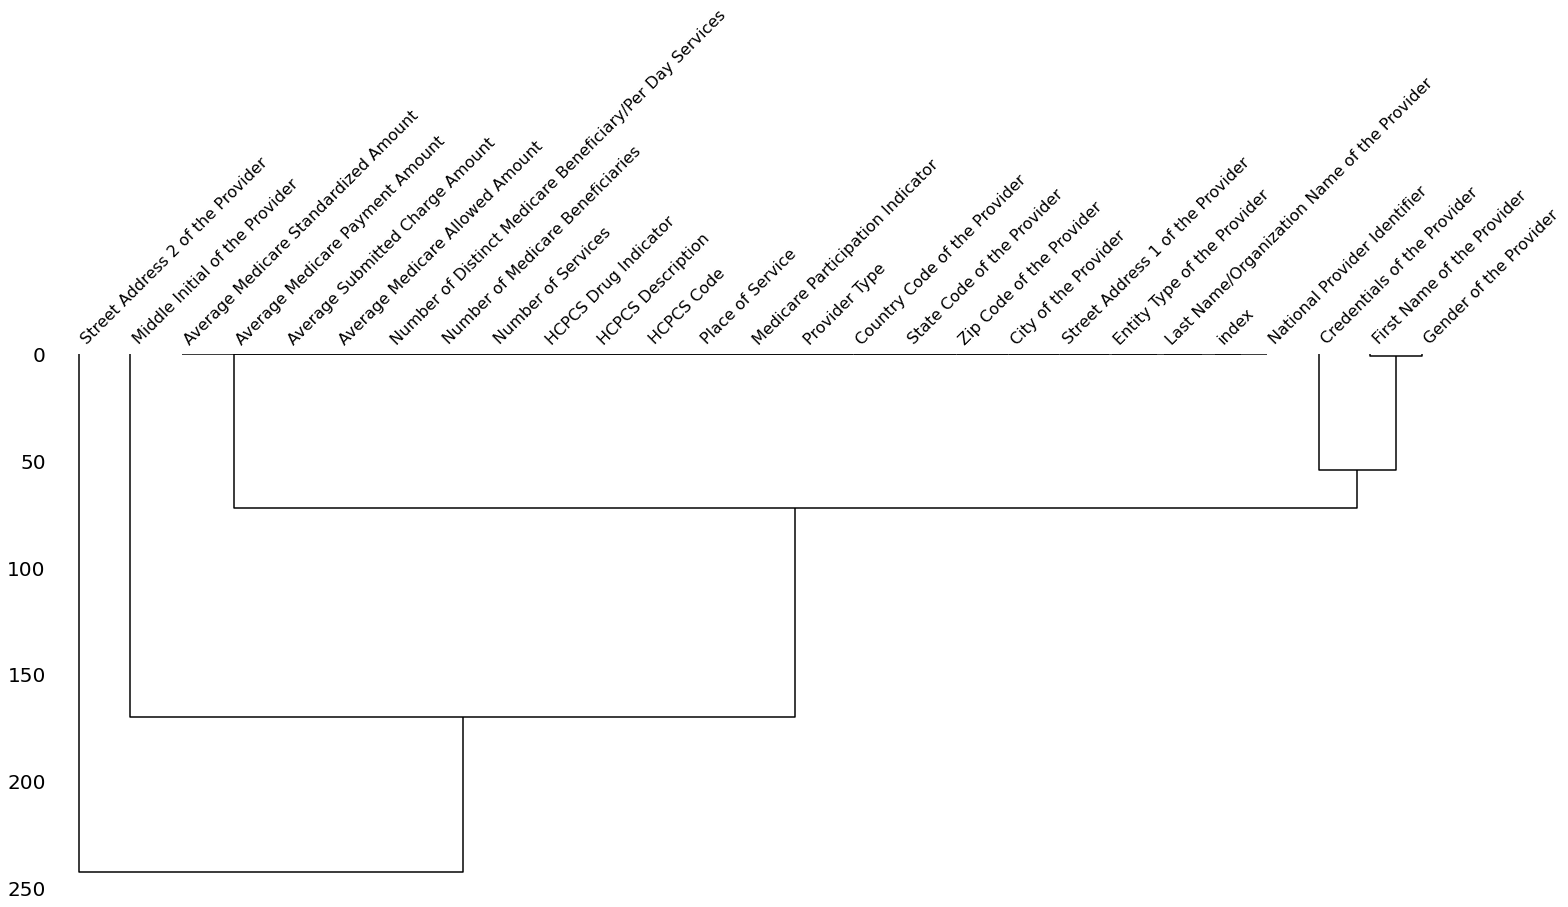

In [20]:
msno.dendrogram(healthcare_data)

# <font color = 'Orange'>Handle the missing values</font>

After you observed the data, the main goal is to know how the columns depend one to another. Therefore, the next step is to select one of the techniques of Machine Learning: Linear Regression, KNN Classification or Logistic Regression that you will use for handling the missing values. You don't need to use the whole dataset for detecting the missing values in one column, you can use a subset of columns that are making the prediction of the target missing value. 


In [21]:
# from sklearn.impute import SimpleImputer
# healthcare_constant = healthcare_data.copy()

# main_imputer = SimpleImputer(strategy = 'constant',  fill_value = 0)
# healthcare_constant.iloc[:,:] = main_imputer.fit_transform(healthcare_constant)
# healthcare_constant.isnull().sum()

index                                                       0
National Provider Identifier                                0
Last Name/Organization Name of the Provider                 0
First Name of the Provider                                  0
Middle Initial of the Provider                              0
Credentials of the Provider                                 0
Gender of the Provider                                      0
Entity Type of the Provider                                 0
Street Address 1 of the Provider                            0
Street Address 2 of the Provider                            0
City of the Provider                                        0
Zip Code of the Provider                                    0
State Code of the Provider                                  0
Country Code of the Provider                                0
Provider Type                                               0
Medicare Participation Indicator                            0
Place of

In [50]:
healthcare_constant = healthcare_data.copy()

main_imputer = SimpleImputer(strategy = 'most_frequent')
healthcare_constant.iloc[:,:] = main_imputer.fit_transform(healthcare_constant)
healthcare_constant.isnull().sum()

index                                                       0
National Provider Identifier                                0
Last Name/Organization Name of the Provider                 0
First Name of the Provider                                  0
Middle Initial of the Provider                              0
Credentials of the Provider                                 0
Gender of the Provider                                      0
Entity Type of the Provider                                 0
Street Address 1 of the Provider                            0
Street Address 2 of the Provider                            0
City of the Provider                                        0
Zip Code of the Provider                                    0
State Code of the Provider                                  0
Country Code of the Provider                                0
Provider Type                                               0
Medicare Participation Indicator                            0
Place of

 K-Nearest Neighbor as techniques

In [49]:
# healthData_knn = healthcare_data.copy(deep=True)

In [51]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

In [52]:
healthcare_data.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,SAINT LOUIS,631041004.0,MO,US,Internal Medicine,Y,F,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,FAYETTEVILLE,283043815.0,NC,US,Obstetrics & Gynecology,Y,O,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,NORTH HAVEN,64732343.0,CT,US,Podiatry,Y,O,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,KANSAS CITY,641183998.0,MO,US,Internal Medicine,Y,O,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,JUPITER,334585700.0,FL,US,Internal Medicine,Y,O,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [63]:
h = healthcare_data.copy()
h.drop('Average Medicare Payment Amount', axis='columns', inplace=True)

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    h[h.columns[1:]],  healthcare_data['Average Medicare Payment Amount'], test_size=0.2)

In [65]:
X_train.shape

(80000, 25)

In [66]:
Y_train.shape

(80000,)

In [62]:
 from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)

ValueError: ignored

In [42]:
 X_test = scaler.transform(X_test)

ValueError: ignored

Logistic regression

In [67]:
 from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter= 15000)
model.fit(X_train, Y_train)

ValueError: ignored

In [ ]:
 LogisticRegression(max_iter=15000)

In [ ]:
y_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, Y_test)))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

# <font color = 'Orange'> Encode non numerical values </font>

In [ ]:
healthcare_data.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,SAINT LOUIS,631041004.0,MO,US,Internal Medicine,Y,F,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,FAYETTEVILLE,283043815.0,NC,US,Obstetrics & Gynecology,Y,O,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,NORTH HAVEN,64732343.0,CT,US,Podiatry,Y,O,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,KANSAS CITY,641183998.0,MO,US,Internal Medicine,Y,O,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,JUPITER,334585700.0,FL,US,Internal Medicine,Y,O,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [68]:
healthcare_data['Gender of the Provider'].value_counts()

M    66641
F    29105
Name: Gender of the Provider, dtype: int64

In [ ]:
healthcare_data['Provider Type'].value_counts()

Diagnostic Radiology                                12537
Internal Medicine                                   11366
Family Practice                                      9760
Nurse Practitioner                                   5713
Cardiology                                           4602
                                                    ...  
Certified Nurse Midwife                                 7
Radiation Therapy Center                                3
Mammography Center                                      3
Pharmacy                                                1
Advanced Heart Failure and Transplant Cardiology        1
Name: Provider Type, Length: 90, dtype: int64

In [ ]:
healthcare_data['Credentials of the Provider'].value_counts() 

MD                   32874
M.D.                 32757
D.O.                  3533
DO                    2478
PA-C                  1859
                     ...  
MD, MHA, MGH             1
NP, DNP                  1
ARNP FNP BC, LMHC        1
PT,GNA,CNA               1
D.O. P.A                 1
Name: Credentials of the Provider, Length: 1854, dtype: int64

In [69]:
classes_gender = list(set(healthcare_data['Gender of the Provider']))
classes_gender

['F', nan, 'M']

In [ ]:
classes = list(set(healthcare_data['Credentials of the Provider']))
classes

[nan,
 'D.O. P.A',
 'MSN., APN., NP-C',
 'AGACNP-BC, FNP-BC',
 'MS, RD, CDE, CDN',
 'M>D>',
 'DMD MD',
 'RN, PMHNP',
 'DO, MPH, DTM&H',
 'M.D., M.B.A., F.A.C.',
 'OD, MPH, FAAO',
 'N.P.-C.',
 'DPM/MPH',
 'APRN,',
 'RN,BSN,MSN,CANP',
 'APRN, PC, FNP',
 'RN APN',
 'MBCHB',
 'M.D., FACC, FSCI',
 'RN, MSN NP-C',
 'CFNP',
 'N.P., PHD',
 'MPT, CERT. MDT',
 'AU.D., FAAA, CCC-A',
 'SRNA',
 'MD  FAAD',
 'PH.D.',
 'MSN FNP BC',
 'DO PA',
 'F.N.P.',
 'M.S., D.O.',
 'D.O., M.H.A.',
 'STUDENT',
 'MD, MSN',
 'PYS.D.',
 'RN, MSN, CNP',
 'O.T.R./L., CHT',
 'M.D., M.S., A.H.E.',
 'PA',
 'P.A.',
 'RN CAGNP',
 'DO, FACOI',
 'MSW, LCSW',
 'PT OCS',
 'MD-PHD',
 'MS DC',
 'MSFNPC',
 'RN NP',
 'RN, CRNA',
 'M.D.,D.O.',
 'MD FACC FACP FCCP',
 'MSN NP',
 'PT, CERT. MDT, NCS',
 'MBBS,MRCP',
 'BSN, MSN, FNP-C',
 'MD FRCPC FABD',
 'MS, OTR/L',
 'M.B.B.S. M.D.',
 'MSN, APRN, FNP',
 'M.D.,P.A',
 'PT, DPT, CFMT',
 'R.PH.',
 'M.D., MB BCH',
 'R.N., A.P.N.',
 'M.B,B.S',
 'M.D., FACS',
 'ARNP FNP-BC',
 'MSW LICSW',
 'A

In [70]:
#Gender of the Provider
dictionaryG = {}
for i in range(0,len(classes_gender)):
    dictionaryG[classes_gender[i]] = i
dictionaryG

{'F': 0, 'M': 2, nan: 1}

In [ ]:
dictionary = {}
for i in range(0,len(classes)):
    dictionary[classes[i]] = i
dictionary

{nan: 0,
 'D.O. P.A': 1,
 'MSN., APN., NP-C': 2,
 'AGACNP-BC, FNP-BC': 3,
 'MS, RD, CDE, CDN': 4,
 'M>D>': 5,
 'DMD MD': 6,
 'RN, PMHNP': 7,
 'DO, MPH, DTM&H': 8,
 'M.D., M.B.A., F.A.C.': 9,
 'OD, MPH, FAAO': 10,
 'N.P.-C.': 11,
 'DPM/MPH': 12,
 'APRN,': 13,
 'RN,BSN,MSN,CANP': 14,
 'APRN, PC, FNP': 15,
 'RN APN': 16,
 'MBCHB': 17,
 'M.D., FACC, FSCI': 18,
 'RN, MSN NP-C': 19,
 'CFNP': 20,
 'N.P., PHD': 21,
 'MPT, CERT. MDT': 22,
 'AU.D., FAAA, CCC-A': 23,
 'SRNA': 24,
 'MD  FAAD': 25,
 'PH.D.': 26,
 'MSN FNP BC': 27,
 'DO PA': 28,
 'F.N.P.': 29,
 'M.S., D.O.': 30,
 'D.O., M.H.A.': 31,
 'STUDENT': 32,
 'MD, MSN': 33,
 'PYS.D.': 34,
 'RN, MSN, CNP': 35,
 'O.T.R./L., CHT': 36,
 'M.D., M.S., A.H.E.': 37,
 'PA': 38,
 'P.A.': 39,
 'RN CAGNP': 40,
 'DO, FACOI': 41,
 'MSW, LCSW': 42,
 'PT OCS': 43,
 'MD-PHD': 44,
 'MS DC': 45,
 'MSFNPC': 46,
 'RN NP': 47,
 'RN, CRNA': 48,
 'M.D.,D.O.': 49,
 'MD FACC FACP FCCP': 50,
 'MSN NP': 51,
 'PT, CERT. MDT, NCS': 52,
 'MBBS,MRCP': 53,
 'BSN, MSN, FNP-C'

In [ ]:
healthcare_data['Credentials of the Provider'] = [dictionary[healthcare_data['Credentials of the Provider'][i]]for i in range(0,len(healthcare_data['Credentials of the Provider']))]

KeyError: ignored

In [71]:
healthcare_data['Gender of the Provider'] = [dictionaryG[healthcare_data['Gender of the Provider'][i]]for i in range(0,len(healthcare_data['Gender of the Provider']))]

In [ ]:
 # label encoding the data 
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder() 
healthcare_data['Credentials of the Provider']= le.fit_transform(healthcare_data['Credentials of the Provider']) 

In [ ]:
healthcare_data

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,1589,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,SAINT LOUIS,631041004.0,MO,US,Internal Medicine,Y,F,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,1589,F,I,2950 VILLAGE DR,NaN,FAYETTEVILLE,283043815.0,NC,US,Obstetrics & Gynecology,Y,O,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,1836,M,I,20 WASHINGTON AVE,STE 212,NORTH HAVEN,64732343.0,CT,US,Podiatry,Y,O,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,726,M,I,5746 N BROADWAY ST,NaN,KANSAS CITY,641183998.0,MO,US,Internal Medicine,Y,O,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,650,M,I,875 MILITARY TRL,SUITE 200,JUPITER,334585700.0,FL,US,Internal Medicine,Y,O,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3837311,1386938868,PAPES,JOAN,NaN,1449,F,I,324 E BALTIMORE ST,NaN,WILMINGTON,604811236.0,IL,US,Physical Therapist in Private Practice,Y,O,97162,"Evaluation of physical therapy, typically 30 m...",N,20,20,20,85.3725,214,60.7255,62.2485
99996,2079360,1215091327,HAYNER,MARGARET,S,1815,F,I,645 NW 4TH ST,NaN,REDMOND,977561502.0,OR,US,Nurse Practitioner,Y,O,99213,Established patient office or other outpatient...,N,136,107,136,61.27,144.05147059,30.006176471,37.040220588
99997,8927965,1902868185,VALENCIA,DANA,NaN,1589,M,I,3009 N BALLAS RD,SUITE 202B,SAINT LOUIS,631312322.0,MO,US,Cardiology,Y,F,93320,"Doppler ultrasound study of heart blood flow, ...",N,11,11,11,17.98,109.54545455,14.09,14.62
99998,8854571,1891941183,GONZALEZ-LAMOS,RAFAELA,NaN,0,F,I,2365 BOSTON POST RD,SUITE 201,LARCHMONT,105383500.0,NY,US,Internal Medicine,Y,O,G0008,Administration of influenza virus vaccine,N,12,12,12,30.54,65,29.93,25.32


 One-Hot encoding

In [73]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
one_enc = OneHotEncoder(handle_unknown='ignore')

enc_df = pd.DataFrame(one_enc.fit_transform(healthcare_data[['Credentials of the Provider']]).toarray())
# merge with the healhcare data on key values
healthcare_data_encoded = healthcare_data.join(enc_df)
healthcare_data_encoded

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,0,1,2,3,4,5,6,7,8,9,10,11,12,...,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849,1850,1851,1852,1853,1854
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,0,I,1402 S GRAND BLVD,FDT 14TH FLOOR,SAINT LOUIS,631041004.0,MO,US,Internal Medicine,Y,F,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3354385,1346202256,JONES,WENDY,P,M.D.,0,I,2950 VILLAGE DR,NaN,FAYETTEVILLE,283043815.0,NC,US,Obstetrics & Gynecology,Y,O,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,2,I,20 WASHINGTON AVE,STE 212,NORTH HAVEN,64732343.0,CT,US,Podiatry,Y,O,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,2,I,5746 N BROADWAY ST,NaN,KANSAS CITY,641183998.0,MO,US,Internal Medicine,Y,O,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,2,I,875 MILITARY TRL,SUITE 200,JUPITER,334585700.0,FL,US,Internal Medicine,Y,O,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3837311,1386938868,PAPES,JOAN,NaN,PT,0,I,324 E BALTIMORE ST,NaN,WILMINGTON,604811236.0,IL,US,Physical Therapist in Private Practice,Y,O,97162,"Evaluation of physical therapy, typically 30 m...",N,20,20,20,85.3725,214,60.7255,62.2485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,2079360,1215091327,HAYNER,MARGARET,S,ARNP,0,I,

In [74]:
# creating instance of one-hot-encoder
one_enc = OneHotEncoder(handle_unknown='ignore')

enc_df = pd.DataFrame(one_enc.fit_transform(healthcare_data[['Middle Initial of the Provider']]).toarray())
# merge with the healhcare data on key values
healthcare_data_encoded = healthcare_data.join(enc_df)
healthcare_data_encoded

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,0,I,1402 S GRAND BLVD,FDT 14TH FLOOR,SAINT LOUIS,631041004.0,MO,US,Internal Medicine,Y,F,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3354385,1346202256,JONES,WENDY,P,M.D.,0,I,2950 VILLAGE DR,NaN,FAYETTEVILLE,283043815.0,NC,US,Obstetrics & Gynecology,Y,O,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,2,I,20 WASHINGTON AVE,STE 212,NORTH HAVEN,64732343.0,CT,US,Podiatry,Y,O,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,2,I,5746 N BROADWAY ST,NaN,KANSAS CITY,641183998.0,MO,US,Internal Medicine,Y,O,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,2,I,875 MILITARY TRL,SUITE 200,JUPITER,334585700.0,FL,US,Internal Medicine,Y,O,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3837311,1386938868,PAPES,JOAN,NaN,PT,0,I,324 E BALTIMORE ST,NaN,WILMINGTON,604811236.0,IL,US,Physical Therapist in Private Practice,Y,O,97162,"Evaluation of physical therapy, typically 30 m...",N,20,20,20,85.3725,214,60.7255,62.2485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99996,2079360,1215091327,HAYNER,MARGARET,S,ARNP,0,I,645 NW 4TH ST,NaN,REDMOND,977561502.0,OR,US,Nurse Practitioner,Y,O,99213,Established patient office or other outpatient...,N,136,107,136,61.27,144.05147059,30.006176471,37.040220588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,8927965,1902868185,VALENCIA,DANA,NaN,M.D.,2,I,3009 N BALLAS RD,SUITE 202B,SAINT LOUIS,631312322.0,MO,US,Cardiology,Y,F,93320,"Doppler ultrasound study of heart blood flow, ...",N,11,11,11,17.98,109.54545455,14.09,14.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99998,8854571,1891941183,GONZALEZ-LAMOS,RAFAELA,NaN,NaN,0,I,2365 BOSTON POST RD,SUITE 201,LARCHMONT,105383500.0,NY,US,Internal Medicine,Y,O,G0008,Administration of influenza viru

# <font color = 'Orange'>Save the new Dataset(.csv) </font>

In [ ]:
#add your code
final_healthcare_dataset=healthcare_data

Print the first rows of your final Dataset

In [ ]:
final_healthcare_dataset.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,1589,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,SAINT LOUIS,631041004.0,MO,US,Internal Medicine,Y,F,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,1589,F,I,2950 VILLAGE DR,NaN,FAYETTEVILLE,283043815.0,NC,US,Obstetrics & Gynecology,Y,O,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,1836,M,I,20 WASHINGTON AVE,STE 212,NORTH HAVEN,64732343.0,CT,US,Podiatry,Y,O,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,726,M,I,5746 N BROADWAY ST,NaN,KANSAS CITY,641183998.0,MO,US,Internal Medicine,Y,O,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,650,M,I,875 MILITARY TRL,SUITE 200,JUPITER,334585700.0,FL,US,Internal Medicine,Y,O,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758
